Author: Reagan Todd

Date: Created 2025-11-17

Purpose: To manipulate different datasets within Python.

Copyright: For educational purposes only.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1- train.csv

**importing the dataset:**

In [3]:
import pandas as pd

df= pd.read_csv("/content/drive/MyDrive/5530/raw_data/train.csv")
print(df.head())

   Unnamed: 0                              Name    Location  Year  \
0           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
1           2                      Honda Jazz V     Chennai  2011   
2           3                 Maruti Ertiga VDI     Chennai  2012   
3           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
4           6            Nissan Micra Diesel XV      Jaipur  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
1              46000    Petrol       Manual      First    13 km/kg  1199 CC   
2              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
3              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   
4              86999    Diesel       Manual      First  23.08 kmpl  1461 CC   

       Power  Seats  New_Price  Price  
0  126.2 bhp    5.0        NaN  12.50  
1   88.7 bhp    5.0  8.61 Lakh

In [30]:
#Handling the Mileage conversion (Based upon fuel density)
df['km_per_kg'] = pd.to_numeric(df['Mileage'].str.extract(r'(\d+\.?\d*)\s*km/kg')[0], errors='coerce')
df['kmpl_raw']  = pd.to_numeric(df['Mileage'].str.extract(r'(\d+\.?\d*)\s*kmpl')[0], errors='coerce')

kmkg_rows = df['Mileage'].str.contains('km/kg', case=False, na=False)

density_map = {'Petrol': 0.75, 'Diesel': 0.84}
df['density'] = df['Fuel_Type'].map(density_map)

df['kmpl_converted'] = df['km_per_kg'] / df['density']

df['kmpl'] = df['kmpl_raw'].fillna(df['kmpl_converted'])
df['kmpl'] = df['kmpl'].round(2)

df.drop(columns=['km_per_kg', 'kmpl_raw', 'kmpl_converted', 'density'], inplace=True)
print(df.head())

   Unnamed: 0                              Name    Location  Year  \
0           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
1           2                      Honda Jazz V     Chennai  2011   
2           3                 Maruti Ertiga VDI     Chennai  2012   
3           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
4           6            Nissan Micra Diesel XV      Jaipur  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  Engine  \
0              41000    Diesel       Manual      First  19.67 kmpl  1582.0   
1              46000    Petrol       Manual      First    13 km/kg  1199.0   
2              87000    Diesel       Manual      First  20.77 kmpl  1248.0   
3              40670    Diesel    Automatic     Second   15.2 kmpl  1968.0   
4              86999    Diesel       Manual      First  23.08 kmpl  1461.0   

    Power  Seats  New_Price  Price   kmpl  
0  126.20    5.0        NaN  12.50  19.67  
1   88.70    5.0       8.61 

**Remove the units from some of the attributes and only keep the numerical values (for
example remove kmpl from “Mileage”, CC from “Engine”, bhp from “Power”, and lakh from
“New_price”).**

In [31]:
df['Engine'] = pd.to_numeric(
    df['Engine'].astype(str).str.replace(' CC', ''),
    errors='coerce')

df['Power'] = pd.to_numeric(
    df['Power'].astype(str).str.replace(' bhp', ''),
    errors='coerce')

df['New_Price'] = pd.to_numeric(
    df['New_Price'].astype(str).str.replace(' Lakh', ''),
    errors='coerce')

print(df[['kmpl', 'Engine', 'Power', 'New_Price']].isna().sum())
print(df.dtypes)



kmpl            2
Engine         36
Power          36
New_Price    5049
dtype: int64
Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
kmpl                 float64
dtype: object


**Look for the missing values in all the columns and either impute them (replace with mean,
median, or mode) or drop them. Justify your action for this task.**

In [32]:
counts = pd.DataFrame({
    'non_missing': df.count(),
    'missing': df.isna().sum()})
print(counts)
print(df.dtypes)

                   non_missing  missing
Unnamed: 0                5847        0
Name                      5847        0
Location                  5847        0
Year                      5847        0
Kilometers_Driven         5847        0
Fuel_Type                 5847        0
Transmission              5847        0
Owner_Type                5847        0
Mileage                   5845        2
Engine                    5811       36
Power                     5811       36
Seats                     5809       38
New_Price                  798     5049
Price                     5847        0
kmpl                      5845        2
Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine               float64
Power                float64
Seats                float64
New_Price   

In [33]:
cols_fill_mean = ['kmpl', 'Seats', 'Power', 'Engine']
df[cols_fill_mean] = df[cols_fill_mean].fillna(df[cols_fill_mean].mean())
df.dropna(subset=['New_Price'], inplace=True)

print(df.isna().sum())
print(df.dtypes)
print(df)

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              1
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
kmpl                 0
dtype: int64
Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
kmpl                 float64
dtype: object
      Unnamed: 0                               Name Location  Year  \
1              2                       Honda Jazz V  Chennai  2011   
5              7  Toyota Innova Crysta 2.8 GX AT 8S  

Mileage, power, seats, and engine missing values were imputed using mean since there was 2-36 missing values. For New_price, missing values were dropped due to the large proportion (84%) of missing values. The dataset is now 798 rows instead of 5842.

 **Change the categorical variables (“Fuel_Type” and “Transmission”) into numerical one hot
encoded value.**

In [34]:
print(df.columns.tolist())

df.columns = df.columns.str.strip()

cat_cols = ['Fuel_Type', 'Transmission']
df = pd.get_dummies(df, columns=cat_cols, drop_first=False, dtype=int)

print(df.dtypes)
print(df.isna().sum())
print(df.head())

['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price', 'kmpl']
Unnamed: 0                  int64
Name                       object
Location                   object
Year                        int64
Kilometers_Driven           int64
Owner_Type                 object
Mileage                    object
Engine                    float64
Power                     float64
Seats                     float64
New_Price                 float64
Price                     float64
kmpl                      float64
Fuel_Type_Diesel            int64
Fuel_Type_Electric          int64
Fuel_Type_Petrol            int64
Transmission_Automatic      int64
Transmission_Manual         int64
dtype: object
Unnamed: 0                0
Name                      0
Location                  0
Year                      0
Kilometers_Driven         0
Owner_Type                0
Mileage                   1
En

**Create one more feature and add this column to the dataset (you can use mutate function in
R for this). For example, you can calculate the current age of the car by subtracting “Year” value
from the current year.**

In [35]:
df['Depreciation'] = df['New_Price'] - df['Price']
df['Depreciation_pct'] = (df['New_Price'] - df['Price']) / df['New_Price'] * 100
print(df.head())

    Unnamed: 0                               Name Location  Year  \
1            2                       Honda Jazz V  Chennai  2011   
5            7  Toyota Innova Crysta 2.8 GX AT 8S   Mumbai  2016   
8           10                   Maruti Ciaz Zeta    Kochi  2018   
13          15        Mitsubishi Pajero Sport 4X4    Delhi  2014   
18          20                  BMW 3 Series 320d    Kochi  2014   

    Kilometers_Driven Owner_Type     Mileage  Engine   Power  Seats  \
1               46000      First    13 km/kg  1199.0   88.70    5.0   
5               36000      First  11.36 kmpl  2755.0  171.50    8.0   
8               25692      First  21.56 kmpl  1462.0  103.25    5.0   
13             110000      First   13.5 kmpl  2477.0  175.56    7.0   
18              32982      First  22.69 kmpl  1995.0  190.00    5.0   

    New_Price  Price   kmpl  Fuel_Type_Diesel  Fuel_Type_Electric  \
1        8.61   4.50  17.33                 0                   0   
5       21.00  17.50  11.3

Depreciation and depreciation percent calculated and added to the df.

**Perform select, filter, rename, mutate, arrange and summarize with group by operations (or
their equivalent operations in python) on this dataset.**

In [36]:
#mutate
from datetime import datetime

current_year = datetime.now().year

df['Car_Age'] = current_year - df['Year']
df['Depreciation_per_year'] = df['Depreciation'] / df['Car_Age']
print(df.head())

    Unnamed: 0                               Name Location  Year  \
1            2                       Honda Jazz V  Chennai  2011   
5            7  Toyota Innova Crysta 2.8 GX AT 8S   Mumbai  2016   
8           10                   Maruti Ciaz Zeta    Kochi  2018   
13          15        Mitsubishi Pajero Sport 4X4    Delhi  2014   
18          20                  BMW 3 Series 320d    Kochi  2014   

    Kilometers_Driven Owner_Type     Mileage  Engine   Power  Seats  ...  \
1               46000      First    13 km/kg  1199.0   88.70    5.0  ...   
5               36000      First  11.36 kmpl  2755.0  171.50    8.0  ...   
8               25692      First  21.56 kmpl  1462.0  103.25    5.0  ...   
13             110000      First   13.5 kmpl  2477.0  175.56    7.0  ...   
18              32982      First  22.69 kmpl  1995.0  190.00    5.0  ...   

     kmpl  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_Petrol  \
1   17.33                 0                   0                 1

calculated the age of the car as well as depreciaition per year.

In [39]:
#select:
base_cols = ['Name', 'Year', 'Price', 'New_Price',
             'kmpl', 'Mileage', 'Engine', 'Power', 'Seats', 'Depreciation',
             'Car_Age', 'Depreciaition_per_year']
base_cols = [col for col in base_cols if col in df.columns]
one_hot_cols = [c for c in df.columns if c.startswith('Fuel_Type_') or c.startswith('Transmission_')]
cols_to_use = base_cols + one_hot_cols

df_selected = df[cols_to_use]
print(df_selected.head())


                                 Name  Year  Price  New_Price   kmpl  \
1                        Honda Jazz V  2011   4.50       8.61  17.33   
5   Toyota Innova Crysta 2.8 GX AT 8S  2016  17.50      21.00  11.36   
8                    Maruti Ciaz Zeta  2018   9.95      10.65  21.56   
13        Mitsubishi Pajero Sport 4X4  2014  15.00      32.01  13.50   
18                  BMW 3 Series 320d  2014  18.55      47.87  22.69   

       Mileage  Engine   Power  Seats  Depreciation  Car_Age  \
1     13 km/kg  1199.0   88.70    5.0          4.11       14   
5   11.36 kmpl  2755.0  171.50    8.0          3.50        9   
8   21.56 kmpl  1462.0  103.25    5.0          0.70        7   
13   13.5 kmpl  2477.0  175.56    7.0         17.01       11   
18  22.69 kmpl  1995.0  190.00    5.0         29.32       11   

    Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_Petrol  \
1                  0                   0                 1   
5                  1                   0                 0

Selected pertinent variables using the df_selected.

In [40]:
#filter
df_filtered = df_selected[df_selected['Year'] >= 2015]
print(df_filtered)

                                   Name  Year  Price  New_Price   kmpl  \
5     Toyota Innova Crysta 2.8 GX AT 8S  2016  17.50      21.00  11.36   
8                      Maruti Ciaz Zeta  2018   9.95      10.65  21.56   
26                  Honda WRV i-VTEC VX  2018   9.90      10.57  17.50   
34        Maruti Vitara Brezza ZDi Plus  2018   8.63      11.12  24.30   
58    Toyota Innova Crysta 2.4 GX MT 8S  2017  16.50      19.34  13.68   
...                                 ...   ...    ...        ...    ...   
5811                Maruti Baleno Alpha  2017   7.50       8.78  21.40   
5812                      Tata Hexa XTA  2016  13.50      21.00  17.60   
5816         Tata Tiago 1.2 Revotron XT  2017   5.11       5.56  23.84   
5827              Tata Bolt Revotron XT  2016   4.00       7.77  17.57   
5833           Maruti Vitara Brezza VDi  2016   7.43       9.93  24.30   

         Mileage  Engine   Power  Seats  Depreciation  Car_Age  \
5     11.36 kmpl  2755.0  171.50    8.0      

filtered using df_filtered and found cars made in 2015 or later. There are 620 vehicles that are this year or later.

In [41]:
#rename
df_renamed = df_filtered.rename(columns={'New_Price': 'MSRP'})
print(df_renamed.head())

                                 Name  Year  Price   MSRP   kmpl     Mileage  \
5   Toyota Innova Crysta 2.8 GX AT 8S  2016  17.50  21.00  11.36  11.36 kmpl   
8                    Maruti Ciaz Zeta  2018   9.95  10.65  21.56  21.56 kmpl   
26                Honda WRV i-VTEC VX  2018   9.90  10.57  17.50   17.5 kmpl   
34      Maruti Vitara Brezza ZDi Plus  2018   8.63  11.12  24.30   24.3 kmpl   
58  Toyota Innova Crysta 2.4 GX MT 8S  2017  16.50  19.34  13.68  13.68 kmpl   

    Engine   Power  Seats  Depreciation  Car_Age  Fuel_Type_Diesel  \
5   2755.0  171.50    8.0          3.50        9                 1   
8   1462.0  103.25    5.0          0.70        7                 0   
26  1199.0   88.70    5.0          0.67        7                 0   
34  1248.0   88.50    5.0          2.49        7                 1   
58  2393.0  147.80    8.0          2.84        8                 1   

    Fuel_Type_Electric  Fuel_Type_Petrol  Transmission_Automatic  \
5                    0        

Renamed the "new price" as MSRP (sticker price) using rename. function

In [43]:
#sort
df_sorted = df_renamed.sort_values(by='kmpl', ascending=False)
print(df_sorted.head())

                           Name  Year  Price   MSRP  kmpl    Mileage  Engine  \
5771           Maruti Dzire LDI  2018   5.90   7.91  28.4  28.4 kmpl  1248.0   
5354           Maruti Dzire LDI  2017   6.00   7.91  28.4  28.4 kmpl  1248.0   
5226           Maruti Swift LDI  2015   5.15   7.01  28.4  28.4 kmpl  1248.0   
4362  Maruti Dzire AMT ZDI Plus  2018   8.55  10.70  28.4  28.4 kmpl  1248.0   
4791       Maruti Dzire AMT VDI  2018   8.37   9.62  28.4  28.4 kmpl  1248.0   

      Power  Seats  Depreciation  Car_Age  Fuel_Type_Diesel  \
5771  73.75    5.0          2.01        7                 1   
5354  73.75    5.0          1.91        8                 1   
5226  74.00    5.0          1.86       10                 1   
4362  73.75    5.0          2.15        7                 1   
4791  73.75    5.0          1.25        7                 1   

      Fuel_Type_Electric  Fuel_Type_Petrol  Transmission_Automatic  \
5771                   0                 0                       0   


sorted data by the mileage (kmpl value) using the .sort_values function.

In [44]:
#summarize/group
#cannot use groupby because of the onehot coded variables for fuel type and
#transmission so I have created a loop for each onehot variable instead of the
#traditional groupby statement.
fuel_cols = [col for col in df_sorted.columns if col.startswith('Fuel_Type_')]
fuel_summary_list = []

for fuel in fuel_cols:
    df_temp = df_sorted[df_sorted[fuel] == 1]
    fuel_summary_list.append({
        'Fuel_Type': fuel.replace('Fuel_Type_', ''),
        'Avg_Price': df_temp['Price'].mean(),
        'Avg_kmpl': df_temp['kmpl'].mean(),
        'Avg_Engine': df_temp['Engine'].mean(),
        'Avg_Power': df_temp['Power'].mean(),
        'Avg_Seats': df_temp['Seats'].mean(),
        'Avg_MSRP': df_temp['MSRP'].mean(),
        'Avg_Depreciation': df_temp['Depreciation'].mean(),
        'Count': len(df_temp)})

df_fuel_summary = pd.DataFrame(fuel_summary_list)
print(df_fuel_summary)

transmission_cols = [col for col in df_sorted.columns if col.startswith('Transmission_')]
transmission_summary_list = []

for transmission in transmission_cols:
   df_temp = df_sorted[df_sorted[transmission] == 1]
   transmission_summary_list.append({
       'Transmission': transmission.replace('Transmission_', ''),
        'Avg_Price': df_temp['Price'].mean(),
        'Avg_kmpl': df_temp['kmpl'].mean(),
        'Avg_Engine': df_temp['Engine'].mean(),
        'Avg_Power': df_temp['Power'].mean(),
        'Avg_Seats': df_temp['Seats'].mean(),
        'Avg_Depreciation': df_temp['Depreciation'].mean(),
        'Avg_MSRP': df_temp['MSRP'].mean(),
        'Count': len(df_temp)})

df_transmission_summary = pd.DataFrame(transmission_summary_list)
print(df_transmission_summary)


  Fuel_Type  Avg_Price   Avg_kmpl   Avg_Engine   Avg_Power  Avg_Seats  \
0    Diesel  18.482545  19.587635  1841.023952  131.737365   5.559880   
1  Electric  13.000000  18.160084    72.000000   41.000000   5.000000   
2    Petrol   9.250105  19.000351  1319.066667   99.848035   5.073684   

    Avg_MSRP  Avg_Depreciation  Count  
0  27.045569          8.563024    334  
1  13.580000          0.580000      1  
2  13.140842          3.890737    285  
  Transmission  Avg_Price   Avg_kmpl   Avg_Engine   Avg_Power  Avg_Seats  \
0    Automatic  23.517479  17.326653  1886.747934  150.440868   5.318182   
1       Manual   8.283651  20.588571  1413.531746   95.479577   5.346561   

   Avg_Depreciation   Avg_MSRP  Count  
0         11.890124  35.407603    242  
1          2.889101  11.172751    378  


Of the 620 vehicles that are 2015 or later models, 334 are diesel, 1 electric, and 285 petrol fuel types. The average MSRP for electric and petrol are nearly the same at 13, but diesel vehicles are double that price at new. Diesels (9) are faster to depreciate compared to the electric (.6) or petrol (4). Diesels have more power.

Of the 620 vehicles, 242 are automatic transmissions and 378 are manual. The average MSRP for automatic transmissions (35) are tripple that of the manual transmissions (11). Automatic vehicles have more power and have a higher depreciation (12) comapred to manual (3).



In [46]:
#using proper groupby statement to see seat comparison
df_seats_summary = df_sorted.groupby('Seats').agg(
    Avg_Price=('Price', 'mean'),
    Avg_MSRP=('MSRP', 'mean'),
    Avg_Depreciation=('Depreciation', 'mean'),
    Avg_Mileage=('kmpl', 'mean'),
    Count=('Price', 'count')
).reset_index()

print(df_seats_summary)

   Seats  Avg_Price   Avg_MSRP  Avg_Depreciation  Avg_Mileage  Count
0    2.0  54.000000  95.040000         41.040000    19.000000      1
1    4.0  34.718889  49.832222         15.113333    17.000000      9
2    5.0  13.231912  19.570618          6.338705    20.279582    502
3    6.0   7.665000   9.735000          2.070000    17.350000      4
4    7.0  17.029271  23.034583          6.005312    15.117708     96
5    8.0  18.511250  21.712500          3.201250    12.810000      8


5 seater vehicles years 2015 and beyond were most prevalent. 96 of the 620 vehicles were 7 seaters. A single two seater was included and the highest MSRP, consequently the highest depreciaition as well. Average mileage ranged from 13kmpl to 20kmpl which the highest being a 5 seater and lowest being the 8 seater.

saving clean dataset into clean_data folder

In [47]:
cleaned_file_drive = "/content/drive/MyDrive/5530/clean_data/5530_trials_clean.csv"
df_sorted.to_csv(cleaned_file_drive, index=False)
print(f"Saved cleaned dataset to Google Drive at {cleaned_file_drive}")

Saved cleaned dataset to Google Drive at /content/drive/MyDrive/5530/clean_data/5530_trials_clean.csv


# Part 2- diabetes.csv

importing dataset.

1=diabetes, 0=no diabetes


In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df= pd.read_csv("/content/drive/MyDrive/5530/raw_data/diabetes.csv")

print(df.dtypes)
print(df.isna().sum())
df.drop(df[df["Glucose"] == 0].index, inplace=True)
print(df)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4        

Imported dataset and removed the 5 rows that reported patients having a glucose of 0.

**Set a seed (to ensure work reproducibility) and take a random sample of 25 observations
and find the mean Glucose and highest Glucose values of this sample and compare these
statistics with the population statistics of the same variable. You should use charts for this
comparison.**

Sample mean Glucose: 134.80
Sample max Glucose: 187.00
Sample min Glucose: 80.00
Population mean Glucose: 121.69
Population max Glucose: 199.00
Population min Glucose: 44.00


/tmp/ipython-input-848528659.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Glucose', data=df_box, palette=['skyblue','orange'])


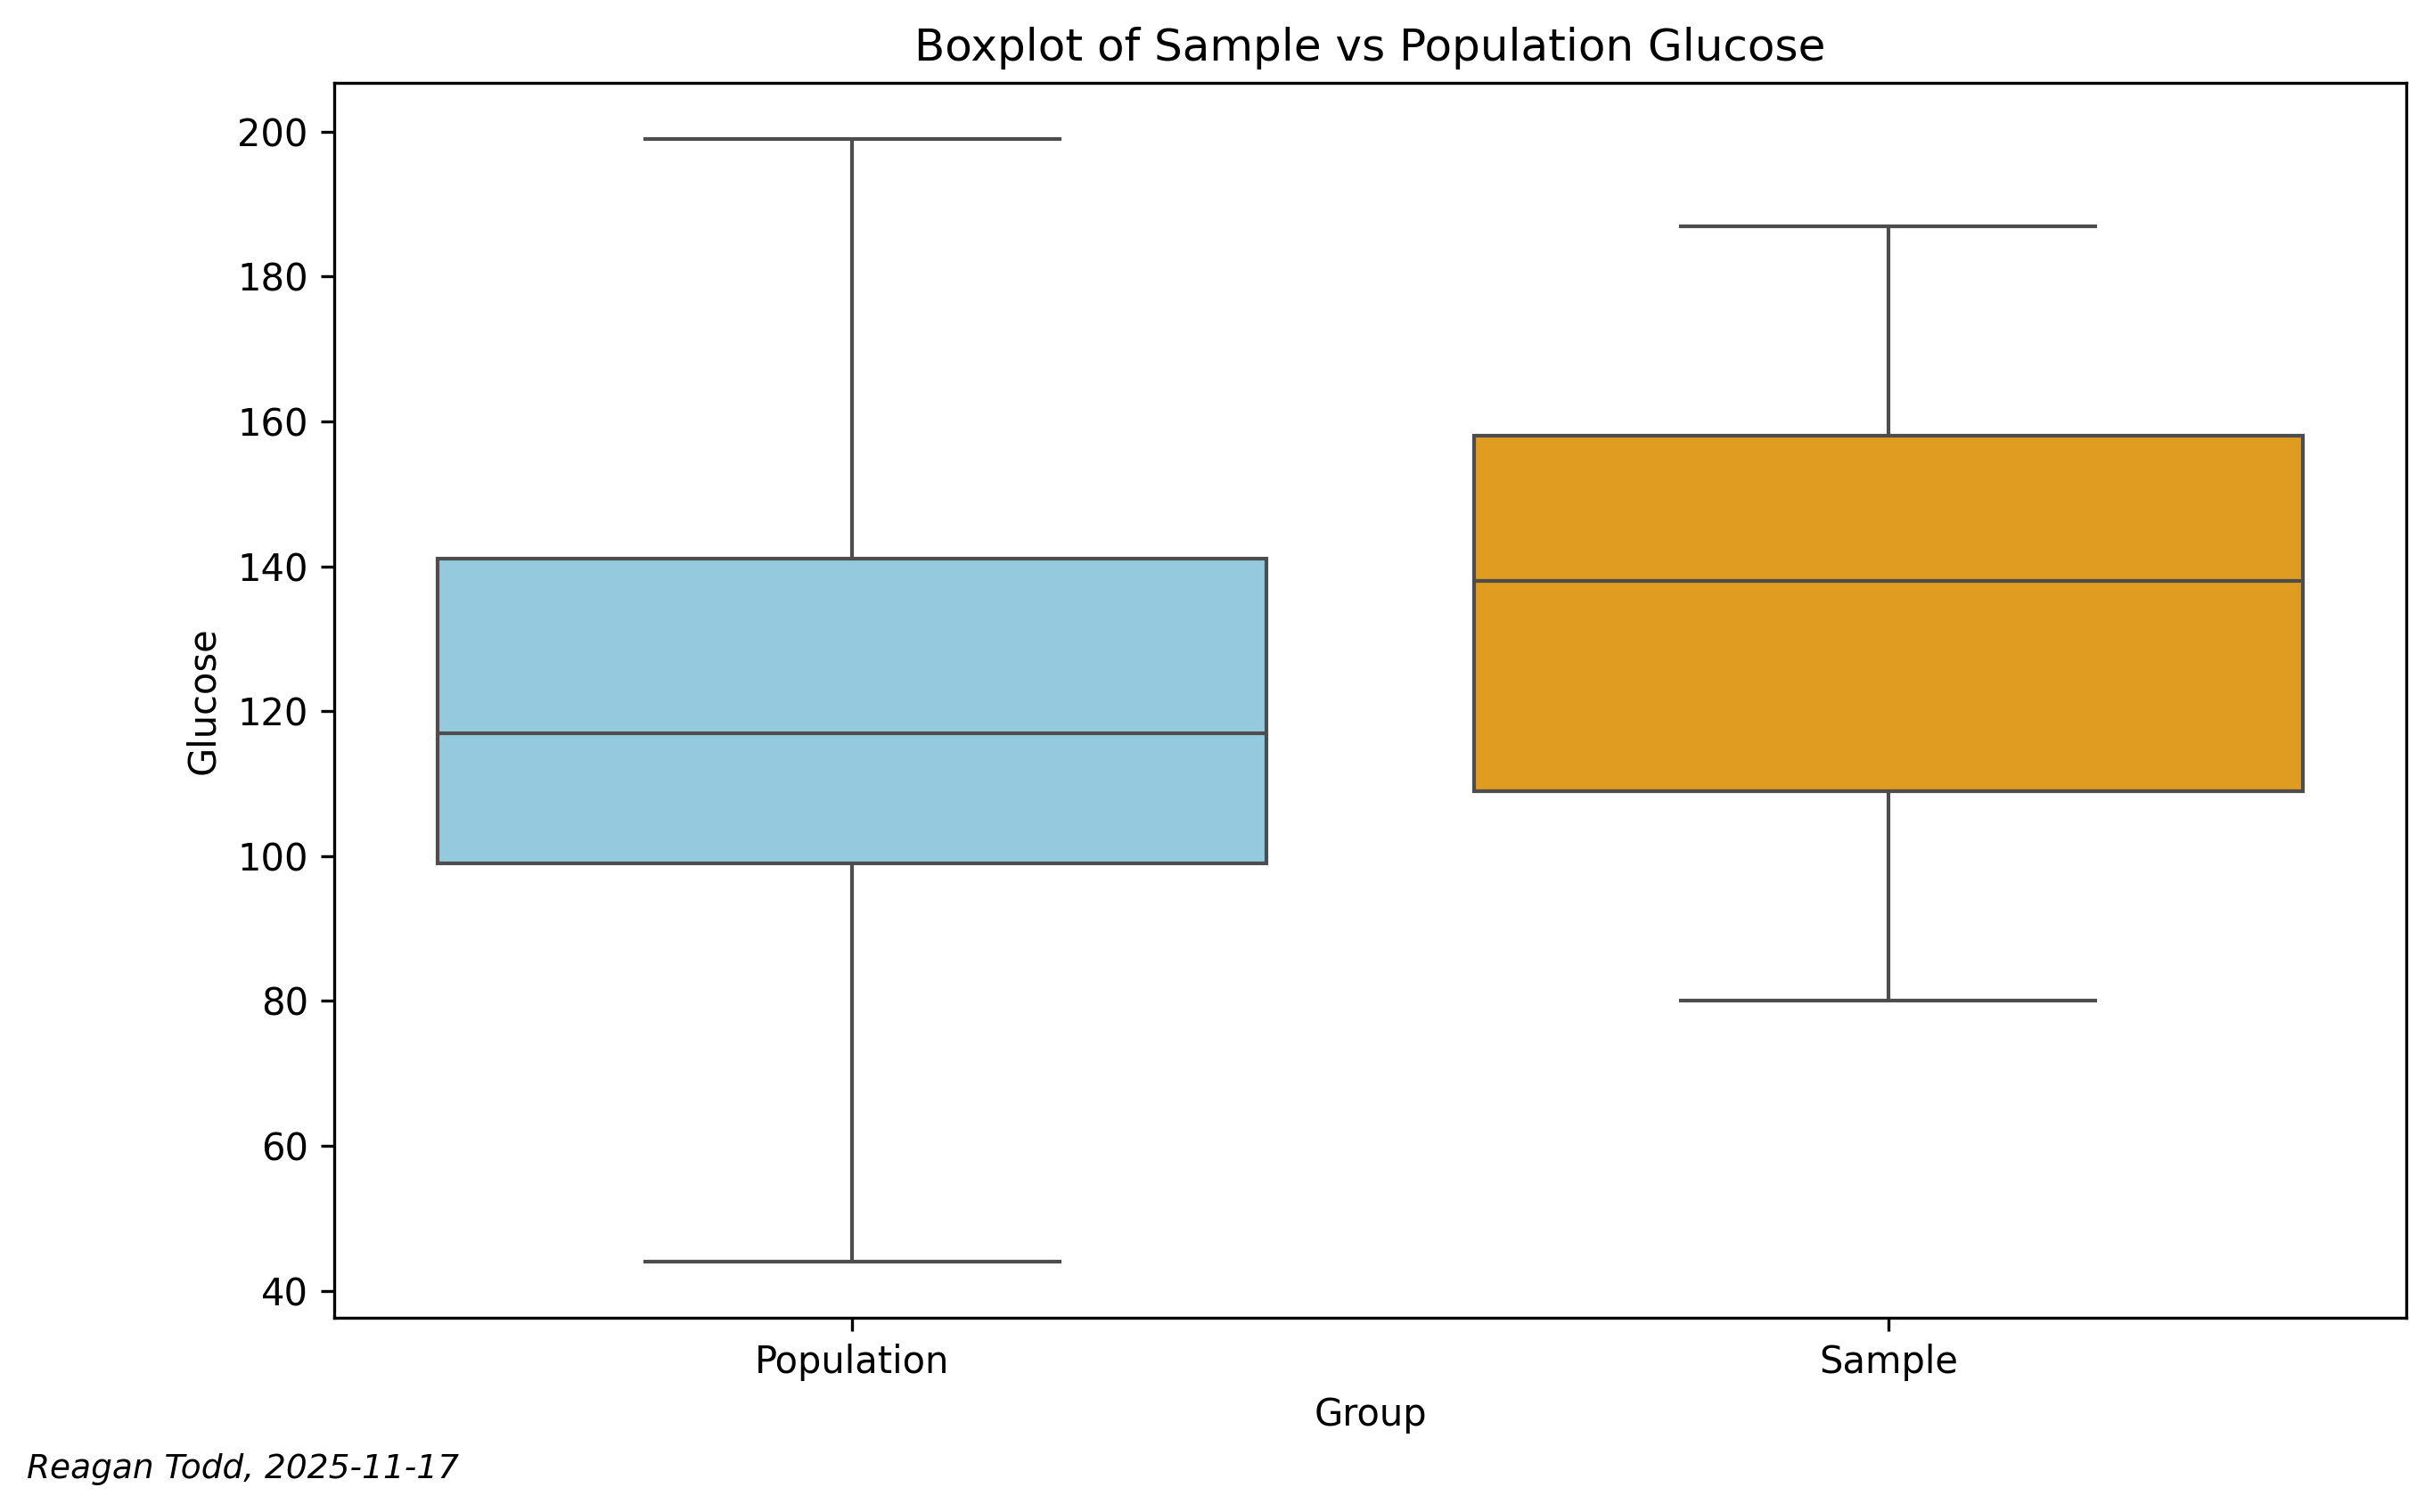

In [55]:
np.random.seed(42)

sample_df = df.sample(n=25, random_state=42)

sample_mean = sample_df['Glucose'].mean()
sample_max = sample_df['Glucose'].max()
sample_min = sample_df['Glucose'].min()

pop_mean = df['Glucose'].mean()
pop_max = df['Glucose'].max()
pop_min = df['Glucose'].min()

print(f"Sample mean Glucose: {sample_mean:.2f}")
print(f"Sample max Glucose: {sample_max:.2f}")
print(f"Sample min Glucose: {sample_min:.2f}")
print(f"Population mean Glucose: {pop_mean:.2f}")
print(f"Population max Glucose: {pop_max:.2f}")
print(f"Population min Glucose: {pop_min:.2f}")

df_box = pd.DataFrame({
    'Glucose': pd.concat([df['Glucose'], sample_df['Glucose']], ignore_index=True),
    'Group': ['Population']*len(df) + ['Sample']*len(sample_df)})

plt.figure(figsize=(10,6), dpi=300)
sns.boxplot(x='Group', y='Glucose', data=df_box, palette=['skyblue','orange'])
plt.ylabel('Glucose')
plt.title('Boxplot of Sample vs Population Glucose')
plt.figtext(0.01, 0.01, "Reagan Todd, 2025-11-17", ha='left', fontsize=9, style="italic")
plt.show()

The sample population has an average glucose of 135mg/dL compared to the general population of 187mg/dL. Max glucose differs by 12mg/dL with general population having a higher max (199mg/dL). The total population has a ranged glucose of 151mg/dL whereas the sample population had a range of 107mg/dL.

**Find the 98th percentile of BMI of your sample and the population and compare the results
using charts.**

Sample 98th Percentile BMI: 47.37
Population 98th Percentile BMI: 47.64


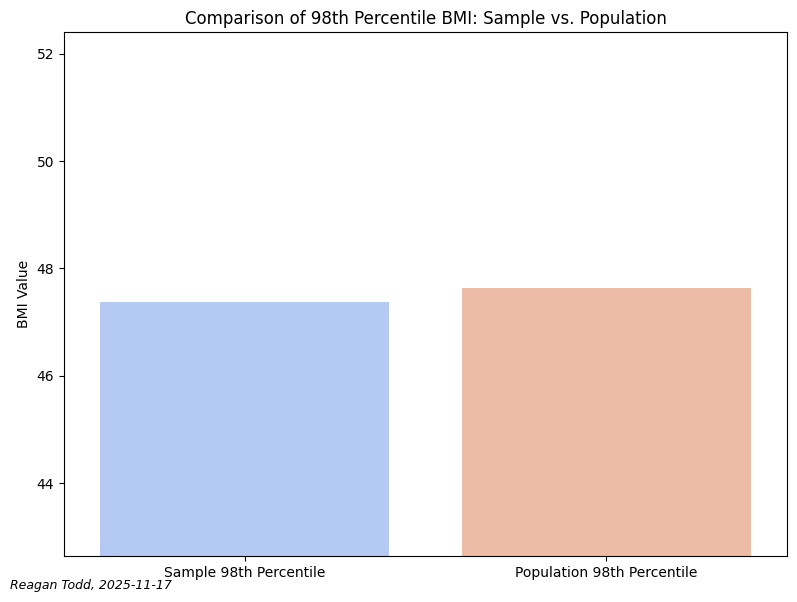

In [56]:
sample_df = df.sample(n=25, random_state=42)

bmi_sample = df['BMI'].sample(n=25, random_state=42)

sample_98th_percentile_bmi = bmi_sample.quantile(0.98)

population_98th_percentile_bmi = df['BMI'].quantile(0.98)

print(f"Sample 98th Percentile BMI: {sample_98th_percentile_bmi:.2f}")
print(f"Population 98th Percentile BMI: {population_98th_percentile_bmi:.2f}")

plot_df = pd.DataFrame({
    'Statistic': ['Sample 98th Percentile', 'Population 98th Percentile'],
    'BMI_Value': [sample_98th_percentile_bmi, population_98th_percentile_bmi]})

plt.figure(figsize=(8, 6))

sns.barplot(x='Statistic', y='BMI_Value', data=plot_df, palette='coolwarm', hue='Statistic', legend=False)
plt.title('Comparison of 98th Percentile BMI: Sample vs. Population')
plt.ylabel('BMI Value')
plt.xlabel('')
plt.ylim(min(sample_98th_percentile_bmi, population_98th_percentile_bmi) * 0.9, max(sample_98th_percentile_bmi, population_98th_percentile_bmi) * 1.1)
plt.figtext(0.01, 0.01, "Reagan Todd, 2025-11-17", ha='left', fontsize=9, style="italic")
plt.tight_layout()
plt.show()

There is roughly a 0.3 kg/m^2 difference in the 98th percentile BMIs. The sample population has a 98th percentile BMI of 47.37 kg/m^2 while the general population has a 98th percentile BMI of 47.64 kg/m^2. This suggests a good representation of BMI between the sample population and general population.

**Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure
and compare this with these statistics from the population for the same variable. Again, you
should create charts for this comparison. Report on your findings.**

         Statistic  Population  Bootstrap_Avg
0             Mean   69.115334      69.170400
1              Std   19.399240      19.165614
2  25th Percentile   62.000000      62.943000
3  50th Percentile   72.000000      71.460000
4  75th Percentile   80.000000      79.548500
5  98th Percentile   99.520000      98.297040


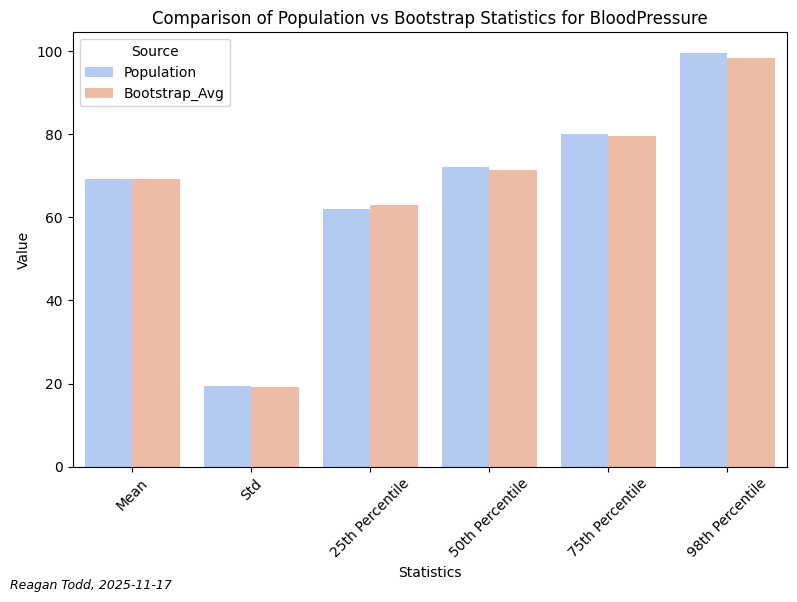

In [61]:
n_bootstrap = 500
sample_size = 150

bootstrap_means = []
bootstrap_stds = []
bootstrap_25th = []
bootstrap_50th = []
bootstrap_75th = []
bootstrap_98th = []

for i in range(n_bootstrap):
    sample = df['BloodPressure'].sample(n=sample_size, replace=True, random_state=i)
    bootstrap_means.append(sample.mean())
    bootstrap_stds.append(sample.std())
    bootstrap_25th.append(sample.quantile(0.25))
    bootstrap_50th.append(sample.quantile(0.5))
    bootstrap_75th.append(sample.quantile(0.75))
    bootstrap_98th.append(sample.quantile(0.98))

bootstrap_stats = pd.DataFrame({
    'Mean': bootstrap_means,
    'Std': bootstrap_stds,
    '25th Percentile': bootstrap_25th,
    '50th Percentile': bootstrap_50th,
    '75th Percentile': bootstrap_75th,
    '98th Percentile': bootstrap_98th})

population_mean = df['BloodPressure'].mean()
population_std = df['BloodPressure'].std()
population_25th = df['BloodPressure'].quantile(0.25)
population_50th = df['BloodPressure'].quantile(0.5)
population_75th = df['BloodPressure'].quantile(0.75)
population_98th = df['BloodPressure'].quantile(0.98)

bootstrap_summary = pd.DataFrame({
    'Statistic': ['Mean', 'Std', '25th Percentile', '50th Percentile',
                  '75th Percentile', '98th Percentile'],
    'Population': [population_mean, population_std, population_25th,
                   population_50th, population_75th, population_98th],
    'Bootstrap_Avg': [
        bootstrap_stats['Mean'].mean(),
        bootstrap_stats['Std'].mean(),
        bootstrap_stats['25th Percentile'].mean(),
        bootstrap_stats['50th Percentile'].mean(),
        bootstrap_stats['75th Percentile'].mean(),
        bootstrap_stats['98th Percentile'].mean()]})

print(bootstrap_summary)

plot_df = pd.melt(
    bootstrap_summary,
    id_vars='Statistic',
    value_vars=['Population', 'Bootstrap_Avg'],
    var_name='Source',
    value_name='Value')

plt.figure(figsize=(8, 6))
sns.barplot(
    x='Statistic',
    y='Value',
    hue='Source',
    data=plot_df,
    palette='coolwarm')

plt.title('Comparison of Population vs Bootstrap Statistics for BloodPressure')
plt.ylabel('Value')
plt.xlabel('Statistics')
plt.xticks(rotation=45)
plt.figtext(0.01, 0.01, "Reagan Todd, 2025-11-17", ha='left', fontsize=9, style='italic')
plt.tight_layout()
plt.show()

After running a bootstrap 500 times with random sample sizes of 150 participants, the results for the two groups were very comparable.

The mean for the general population was 69.1 mmHg compared to the boostrap population averages of 69.2 mmHg. This shows good alignment of the bootstrapping to the general population.

The standard deviation revealed a similar trend between groups where the general population showed a standard deviation of 19.4 mmHg compared to the bootstrapped samples of 19.2 mmHg. This also shows good alignment of the bootstrapping to the general population.

For each of the quartiles (25, 50, and 75) the two populations were within 1mmHg when compared. This would suggest a good alignment from the bootstrapping.

The most variation was seen within the 98th percentiles for the two groups. The general population had a 98th percentile blood pressure value of 99.5 mmHg compared to the bootstrapped samples of 98.3 mmHg. This still shows very good alignment of general population and the bootstrapped samples, but 1 mmHg could be detremental to some groups (but not for me).

saving clean datafile into clean_data file

In [62]:
cleaned_file_drive = "/content/drive/MyDrive/5530/clean_data/5530_diabetes_clean.csv"
df.to_csv(cleaned_file_drive, index=False)
print(f"Saved cleaned dataset to Google Drive at {cleaned_file_drive}")

Saved cleaned dataset to Google Drive at /content/drive/MyDrive/5530/clean_data/5530_diabetes_clean.csv
